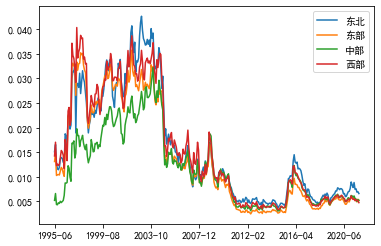

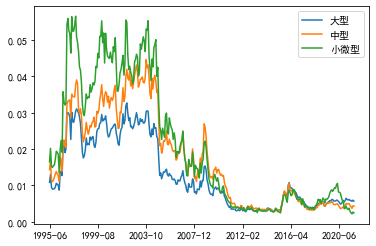

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 22 21:41:02 2021

@author: Administrator
"""
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 22 18:04:05 2021

@author: Administrator
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# daily_data = pd.read_csv('combined_pd_dummy_daily.csv')
monthly_data = pd.read_csv('combined_pd_dummy_monthly.csv')
Info = pd.read_csv('compinfonew.csv',usecols=[57,31,5]) 
#ID=21318的省份缺失，ID=200074省份缺失，已补充
#ID = 5243,类型缺失，跳过
Info = Info.dropna(axis=0,how='any')
Info.columns=['地区','企业规模','U3_ID']
Info = Info.reindex(columns=['U3_ID','地区','企业规模'])
# Info['地区'].unique() 
dict = {'东北':['辽宁省','吉林省','黑龙江省'],
        '东部':['北京','天津','河北省','山东省','上海', '江苏省','浙江省','广东省','福建省','海南省'],
        '中部':['山西省','河南省','湖北省', '湖南省','安徽省','江西省'],
        '西部':['四川省','重庆','陕西省', '甘肃省','宁夏回族自治区','云南省', '贵州省', '广西壮族自治区', '内蒙古自治区','新疆维吾尔自治区','青海省','西藏自治区']}

temp_dict = {}
for i in dict.keys():
    for j in dict[i]:
        temp_dict[j] = i
        
ID_unique =  monthly_data['U3_ID'].unique() 
'''
ID_unique = np.delete(ID_unique, np.where(ID_unique == 5243))
ID_unique = np.delete(ID_unique, np.where(ID_unique == 5254))
ID_unique = np.delete(ID_unique, np.where(ID_unique == 5258))
ID_unique = np.delete(ID_unique, np.where(ID_unique == 5361))
'''
temp_d = []
temp_q = []
r = []
for i in range(len(ID_unique)):
    try:
        temp_d.append(Info[Info[:]['U3_ID']==ID_unique[i]]['地区'].values[0])
        temp_q.append(Info[Info[:]['U3_ID']==ID_unique[i]]['企业规模'].values[0])
    except:
        r.append(ID_unique[i])
# r中保存的都是没有企业规模的ID，全都跳过
for id in r:
    ID_unique = np.delete(ID_unique, np.where(ID_unique == id))
    
    
ID_info = pd.DataFrame({'U3_ID':ID_unique,'地区':temp_d,'企业规模':temp_q})
ID_info = ID_info.replace({"地区": temp_dict})

# 对月数据进行处理:地区
result_di_0,result_di_1,result_di_2,result_di_3 = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
for id in ID_info.loc[:]['U3_ID']:
    x = monthly_data.loc[monthly_data.loc[:]['U3_ID']==id]
    y = pd.DataFrame(x.loc[:]['12_Month'].values,index=x.loc[:]['Date'].values,columns=[str(id)])
    d = ID_info.loc[ID_info.loc[:]['U3_ID']==id]['地区'].values[0]
    if d == '东北':
        result_di_0 = pd.concat([y,result_di_0],axis=1)
    elif d == '东部':
        result_di_1 = pd.concat([y,result_di_1],axis=1)
    elif d == '中部':
        result_di_2 = pd.concat([y,result_di_2],axis=1)
    else:
        result_di_3 = pd.concat([y,result_di_3],axis=1)
result_di_0.sort_index(inplace=True)
result_di_1.sort_index(inplace=True)
result_di_2.sort_index(inplace=True)
result_di_3.sort_index(inplace=True)


result_di_00 = pd.DataFrame([result_di_0.iloc[i].median() for i in range(len(result_di_0)) ],index=result_di_0.index,columns=['东北'])
result_di_11 = pd.DataFrame([result_di_1.iloc[i].median() for i in range(len(result_di_1)) ],index=result_di_1.index,columns=['东部'])
result_di_22 = pd.DataFrame([result_di_2.iloc[i].median() for i in range(len(result_di_2)) ],index=result_di_2.index,columns=['中部'])
result_di_33 = pd.DataFrame([result_di_3.iloc[i].median() for i in range(len(result_di_3)) ],index=result_di_3.index,columns=['西部'])


result_di = pd.concat([result_di_00,result_di_11,result_di_22,result_di_33],axis=1)
result_di = result_di.dropna()
t = [x[:7] for x in result_di.index]
result_di.index = t

'''
ax = result_di.plot() 
fig = ax.get_figure()
fig.savefig('fig3.png',dpi=2000,bbox_inches = 'tight')
'''
#每个月只保存一个数据
result_dii = result_di[~result_di.index.duplicated(keep='last')]

ax = result_dii.plot() 
fig = ax.get_figure()
fig.savefig('fig3_1.png',dpi=2000,bbox_inches = 'tight')

# 对月数据进行处理：大型、中型、小微型
result_x_0,result_x_1,result_x_2 = pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
for id in ID_info.loc[:]['U3_ID']:
    x = monthly_data.loc[monthly_data.loc[:]['U3_ID']==id]
    y = pd.DataFrame(x.loc[:]['12_Month'].values,index=x.loc[:]['Date'].values,columns=[str(id)])
    d = ID_info.loc[ID_info.loc[:]['U3_ID']==id]['企业规模'].values[0]
    if d == '大型':
        result_x_0 = pd.concat([y,result_x_0],axis=1)
    elif d == '中型':
        result_x_1 = pd.concat([y,result_x_1],axis=1)
    else:
        result_x_2 = pd.concat([y,result_x_2],axis=1)
result_x_0.sort_index(inplace=True)
result_x_1.sort_index(inplace=True)
result_x_2.sort_index(inplace=True)

result_x_00 = pd.DataFrame([result_x_0.iloc[i].median() for i in range(len(result_x_0)) ],index=result_x_0.index,columns=['大型'])
result_x_11 = pd.DataFrame([result_x_1.iloc[i].median() for i in range(len(result_x_1)) ],index=result_x_1.index,columns=['中型'])
result_x_22 = pd.DataFrame([result_x_2.iloc[i].median() for i in range(len(result_x_2)) ],index=result_x_2.index,columns=['小微型'])

result_x = pd.concat([result_x_00,result_x_11,result_x_22],axis=1)
result_x = result_x.dropna()
t = [x[:7] for x in result_x.index]
result_x.index = t
'''

result_x_00 = pd.DataFrame([result_x_0.iloc[i].median() for i in range(len(result_x_0)) ],index=[x[:7] for x in result_x_0.index],columns=['大型'])
result_x_11 = pd.DataFrame([result_x_1.iloc[i].median() for i in range(len(result_x_1)) ],index=[x[:7] for x in result_x_1.index],columns=['中型'])
result_x_22 = pd.DataFrame([result_x_2.iloc[i].median() for i in range(len(result_x_2)) ],index=[x[:7] for x in result_x_2.index],columns=['微小型'])

result_x_000 = pd.DataFrame(index=result_x_00.index.unique(),columns=['大型'])
for d in result_x_00.index.unique():
    result_x_000.loc[d]['大型'] = result_x_00.loc[result_x_00.index == d].mean().values[0]
    
result_x_111 = pd.DataFrame(index=result_x_11.index.unique(),columns=['中型'])
for d in result_x_11.index.unique():
    result_x_111.loc[d]['中型'] = result_x_11.loc[result_x_11.index == d].mean().values[0]
    
result_x_222 = pd.DataFrame(index=result_x_22.index.unique(),columns=['微小型'])
for d in result_x_22.index.unique():
    result_x_222.loc[d]['微小型'] = result_x_22.loc[result_x_22.index == d].mean().values[0]
    
result_x = pd.concat([result_x_000,result_x_111,result_x_222],axis=1)
result_x = result_x.dropna()
'''
'''
ax = result_x.plot() 
fig = ax.get_figure()
fig.savefig('fig4.png',dpi=2000,bbox_inches = 'tight')
'''
#每个月只保存一个数据
result_xx = result_x[~result_x.index.duplicated(keep='last')]

ax = result_xx.plot() 
fig = ax.get_figure()
fig.savefig('fig4_1.png',dpi=2000,bbox_inches = 'tight')
